# 1. PosteriorDB

See https://arxiv.org/abs/2407.04967v1

In [1]:
from flax.nnx import state
from posteriordb import PosteriorDatabase
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from posteriordb.posterior_database import filename

In [2]:
pdb_path = "../../posteriordb/posterior_database"
my_pdb = PosteriorDatabase(pdb_path)

In [3]:
posterior = my_pdb.posterior("kidiq-kidscore_momhsiq")

p_model = posterior.model
p_data = posterior.data

## 1.1. Accessing the data

In [4]:
p_data.information

{'name': 'kidiq',
 'keywords': ['ARM', 'Ch. 3', 'stan_examples'],
 'title': 'Cognitive test scores of three- and four-year-old children',
 'description': '  - N         : number of observations\n  - kid_score : cognitive test scores of three- and four-year-old children\n  - mom_hs    : did mother complete high school? 1: Yes, 0: No\n  - mom_iq    : mother IQ score\n  - mom_hs_new: new data for prediction\n  - mom_iq_new: new data for prediction',
 'urls': 'https://github.com/stan-dev/example-models/tree/master/ARM/Ch.3',
 'references': 'gelman2006data',
 'added_date': '2020-01-10',
 'added_by': 'Mans Magnusson'}

In [5]:
print(p_data.information["description"])

  - N         : number of observations
  - kid_score : cognitive test scores of three- and four-year-old children
  - mom_hs    : did mother complete high school? 1: Yes, 0: No
  - mom_iq    : mother IQ score
  - mom_hs_new: new data for prediction
  - mom_iq_new: new data for prediction


In [6]:
values_dict = p_data.values()
for key, vals in values_dict.items():
    print(f"{key}: {type(vals)}")

N: <class 'int'>
kid_score: <class 'list'>
mom_hs: <class 'list'>
mom_iq: <class 'list'>
mom_hs_new: <class 'int'>
mom_iq_new: <class 'int'>


In [7]:
data_df = pd.DataFrame(values_dict, columns=['kid_score', 'mom_hs', 'mom_iq'])
data_df

,kid_score,mom_hs,mom_iq
0,65,1,121.117529
1,98,1,89.361882
2,85,1,115.443165
3,83,1,99.449639
4,115,1,92.745710
...,...,...,...
429,94,0,84.877412
430,76,1,92.990392
431,50,0,94.859708
432,88,1,96.856624


In [8]:
data_df.describe()

,kid_score,mom_hs,mom_iq
count,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000
std,20.410688,0.410799,15.000000
min,20.000000,0.000000,71.037405
25%,74.000000,1.000000,88.660321
50%,90.000000,1.000000,97.915254
75%,102.000000,1.000000,110.272742
max,144.000000,1.000000,138.893106


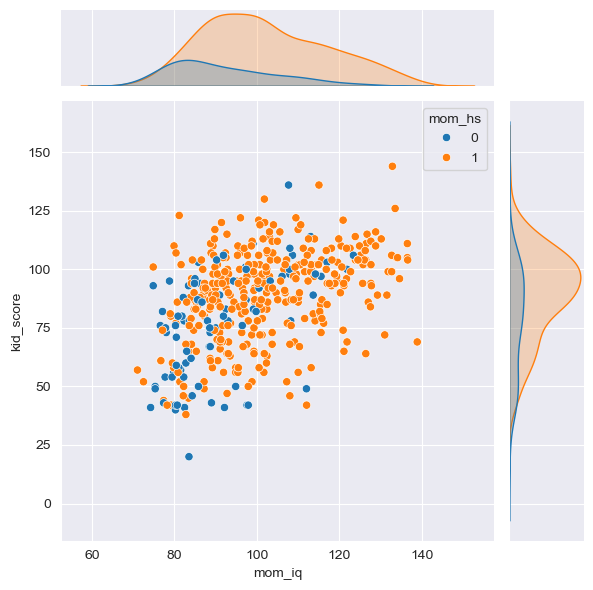

In [9]:
sns.jointplot(data_df, x="mom_iq", y="kid_score", hue="mom_hs")

## 1.2. Accessing the model

In [10]:
p_model.information

{'name': 'kidscore_momhsiq',
 'keywords': ['ARM', 'Ch. 3', 'stan_examples'],
 'title': 'Multiple Predictors Linear Model',
 'prior': {'keywords': 'stan_recommended_35dbfe6'},
 'description': 'kid_score ~ mom_hs + mom_iq',
 'urls': 'https://raw.githubusercontent.com/stan-dev/example-models/master/ARM/Ch.3/kidiq_multi_preds.stan',
 'references': 'gelman2006data',
 'added_date': '2020-01-13',
 'added_by': 'Oliver Järnefelt'}

In [11]:
print(p_model.stan_code())

data {
  int<lower=0> N;
  vector<lower=0, upper=200>[N] kid_score;
  vector<lower=0, upper=200>[N] mom_iq;
  vector<lower=0, upper=1>[N] mom_hs;
}
parameters {
  vector[3] beta;
  real<lower=0> sigma;
}
model {
  sigma ~ cauchy(0, 2.5);
  kid_score ~ normal(beta[1] + beta[2] * mom_hs + beta[3] * mom_iq, sigma);
}





## 1.3. Accessing the posterior

In [12]:
posterior.information

{'keywords': ['arm book', 'stan examples'],
 'urls': 'https://github.com/stan-dev/example-models/tree/master/ARM/Ch.3',
 'references': 'gelman2006data',
 'dimensions': {'beta': 3, 'sigma': 1},
 'added_date': '2020-01-13',
 'added_by': 'Oliver Järnefelt'}

In [13]:
posterior.name

'kidiq-kidscore_momhsiq'

In [14]:
posterior.reference_draws_info()['inference']

{'method': 'stan_sampling',
 'method_arguments': {'chains': 10,
  'iter': 20000,
  'warmup': 10000,
  'thin': 10,
  'seed': 4711,
  'control': {'adapt_delta': 0.8}}}

In [15]:
posterior.reference_draws_info()["diagnostics"]

{'diagnostic_information': {'names': ['beta[1]',
   'beta[2]',
   'beta[3]',
   'sigma']},
 'ndraws': 10000,
 'nchains': 10,
 'effective_sample_size_bulk': [10261.1339699153,
  10231.4957351984,
  10250.2853386041,
  10062.1856671618],
 'effective_sample_size_tail': [10079.2391372892,
  9953.80983922285,
  10074.5986042733,
  9914.740345211],
 'r_hat': [0.999869000404669,
  1.00011735563098,
  0.999836416246855,
  1.00053606689533],
 'divergent_transitions': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'expected_fraction_of_missing_information': [1.96606679499034,
  2.06176484692665,
  2.05598322842441,
  1.90234956255607,
  2.03136969985891,
  2.00916989171201,
  2.06417949120362,
  1.99690889413627,
  2.0089226830519,
  1.96529260910074]}

Convergence diagnostic $\hat{R}$ is used: https://doi.org/10.1214/20-BA1221

In [16]:
reference_draws = posterior.reference_draws()
len(reference_draws)

10

Data structure:

[

    {                     - chain1
        param1: [...],
        param2: [...],
        ...
    },
    
    {...},                - chain2,

    ...
    
    {...}                 - chain10
]

In [17]:
reference_draws[0].keys()

dict_keys(['beta[1]', 'beta[2]', 'beta[3]', 'sigma'])

In [18]:
# Combine all chain draws into a single DataFrame and add chain identifier
reference_draws_df = pd.concat([
    pd.DataFrame(chain_draw).assign(chain_id=i)
    for i, chain_draw in enumerate(reference_draws)
])

# reference_draws_df["step"] = reference_draws_df.index

# Rename beta columns to adjust the indices for later usage
reference_draws_df.rename(columns={f"beta[{i+1}]": f"beta[{i}]" for i in range(3)}, inplace=True)
var_cols = ["beta[0]", "beta[1]", "beta[2]", "sigma"]

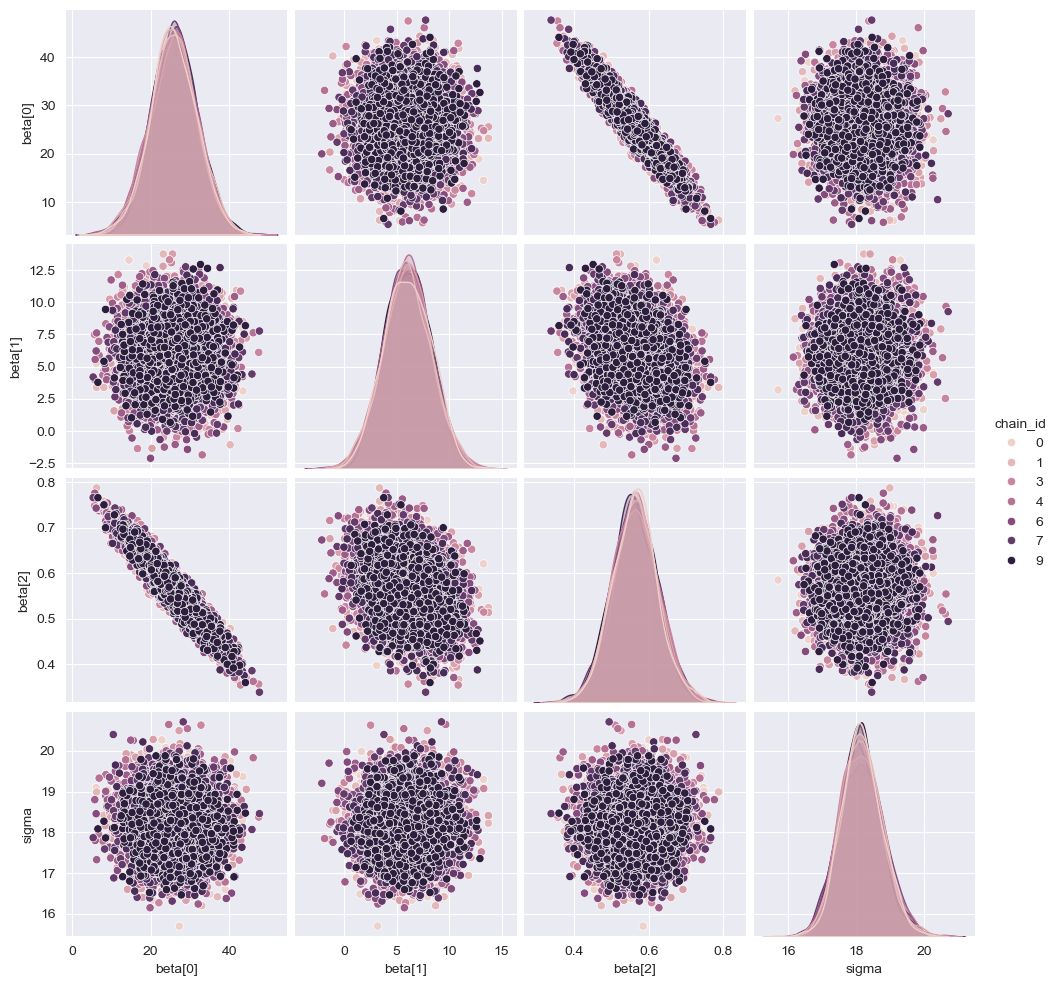

In [19]:
sns.pairplot(reference_draws_df, vars=var_cols, hue="chain_id")

In [20]:
# sns.scatterplot(reference_draws_df, x=reference_draws_df.index, y="sigma", marker='.')

In [21]:
reference_draws_df.drop(columns=["chain_id"], inplace=True)

# 2. NumPyro

See https://num.pyro.ai/en/latest/index.html

In [22]:
import numpyro
import numpyro.distributions as dist
import numpyro.infer as infer
from jax import random
import jax.numpy as jnp

In [23]:
mom_iq=jnp.array(data_df["mom_iq"])
mom_hs=jnp.array(data_df["mom_hs"])
kid_score=jnp.array(data_df["kid_score"])

## 2.1. Specifying the model

In [24]:
print(p_model.stan_code())

data {
  int<lower=0> N;
  vector<lower=0, upper=200>[N] kid_score;
  vector<lower=0, upper=200>[N] mom_iq;
  vector<lower=0, upper=1>[N] mom_hs;
}
parameters {
  vector[3] beta;
  real<lower=0> sigma;
}
model {
  sigma ~ cauchy(0, 2.5);
  kid_score ~ normal(beta[1] + beta[2] * mom_hs + beta[3] * mom_iq, sigma);
}





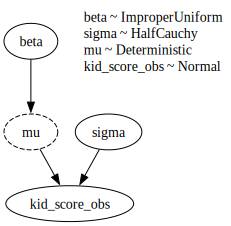

In [46]:
def model(mom_iq, mom_hs, kid_score=None):

    # Priors
    beta = numpyro.sample("beta", dist.ImproperUniform(dist.constraints.real_vector, (), event_shape=(3,)))
    sigma = numpyro.sample("sigma", dist.HalfCauchy(2.5))

    # Linear model
    ones = jnp.ones_like(mom_hs)
    X = jnp.stack([ones, mom_hs, mom_iq], axis=1)
    # mu = numpyro.deterministic("mu", jnp.matmul(X, beta))
    mu = jnp.matmul(X, beta)
    # mu = beta[0] + beta[1] * mom_hs + beta[2] * mom_iq

    # Observed variable
    numpyro.sample("kid_score_obs", dist.Normal(mu, sigma), obs=kid_score)

infer.inspect.render_model(model, model_args=(mom_iq, mom_hs), render_distributions=True, filename="/Users/mikhail/Master/adaptive-mcmc/img/svg/model_kidiq_kidscore.svg")

In [26]:
median_df = reference_draws_df.median()
median_params = {"beta": jnp.array(median_df.loc[["beta[0]", "beta[1]", "beta[2]"]]), "sigma": jnp.array(median_df.loc[["sigma"]]).squeeze()}
median_params

{'beta': Array([25.826162  ,  5.9810157 ,  0.56268334], dtype=float32),
 'sigma': Array(18.11915, dtype=float32)}

In [27]:
log_density, _ = infer.util.log_density(model, model_args=(mom_iq, mom_hs, kid_score), model_kwargs={}, params=median_params)
log_density

Array(-1877.3457, dtype=float32)

## 2.2. Specifying the kernel

Or use Sample Adaptive MCMC kernel from https://proceedings.neurips.cc/paper_files/paper/2019/file/2cfa8f9e50e0f510ede9d12338a5f564-Paper.pdf

In [28]:
from kernels import ARWMH, ASSS, NUTS
kernel_rwm = ARWMH(model)
kernel_sss = ASSS(model)
kernel_nuts = NUTS(model)

## 2.3 Running MCMC

In [ ]:
mcmc = infer.MCMC(kernel_sss, num_warmup=10000, num_samples=100000, thinning=1)
rng_key = random.PRNGKey(49)

mcmc.run(rng_key,
         mom_iq=mom_iq, mom_hs=mom_hs, kid_score=kid_score,
         extra_fields=("potential_energy", "adapt_state")
        )

In [30]:
state = mcmc.last_state
state

ASSSState(i=Array(110000, dtype=int32, weak_type=True), z={'beta': Array([25.894663 ,  4.612606 ,  0.5735524], dtype=float32), 'sigma': Array(2.8543348, dtype=float32)}, potential_energy=Array(1875.3247, dtype=float32), adapt_state=ASSSAdaptState(loc=Array([25.48256  ,  6.0965037,  0.5649948,  2.8986614], dtype=float32), scale=Array([[ 5.9596643e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-6.2733851e-02,  2.2228198e+00,  0.0000000e+00,  0.0000000e+00],
       [-5.7812572e-02, -1.7104102e-02,  8.3185146e-03,  0.0000000e+00],
       [ 1.7822749e-03, -4.1048219e-03,  7.3166407e-04,  3.7354831e-02]],      dtype=float32)), rng_key=Array([1705130790, 1903930668], dtype=uint32))

In [31]:
import pickle
with open("mcmc_runs/test.pkl", "wb") as f:
    pickle.dump(mcmc, f)

In [32]:
with open("mcmc_runs/test.pkl", "rb") as f:
    mcmc = pickle.load(f)

In [33]:
posterior_samples = mcmc.get_samples()
extra_fields = mcmc.get_extra_fields()
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
   beta[0]     25.76      5.83     25.77     16.08     35.31  86131.32      1.00
   beta[1]      5.94      2.21      5.94      2.31      9.59  85121.90      1.00
   beta[2]      0.56      0.06      0.56      0.47      0.66  77225.38      1.00
     sigma     18.15      0.62     18.14     17.14     19.16  91339.49      1.00



In [34]:
posterior_samples_df = pd.DataFrame({
    
    "beta[0]": posterior_samples["beta"][:,0],
    "beta[1]": posterior_samples["beta"][:,1],
    "beta[2]": posterior_samples["beta"][:,2],
    "sigma": posterior_samples["sigma"],
    "potential_energy": extra_fields["potential_energy"]
})

posterior_samples_df["step"] = posterior_samples_df.index * mcmc.thinning

# posterior_samples_df

[]

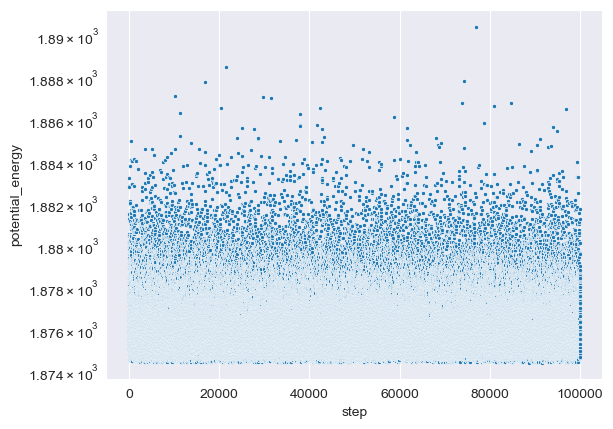

In [35]:
sns.scatterplot(posterior_samples_df, x="step", y="potential_energy", marker='.')
plt.semilogy()
# plt.xlabel("Step")


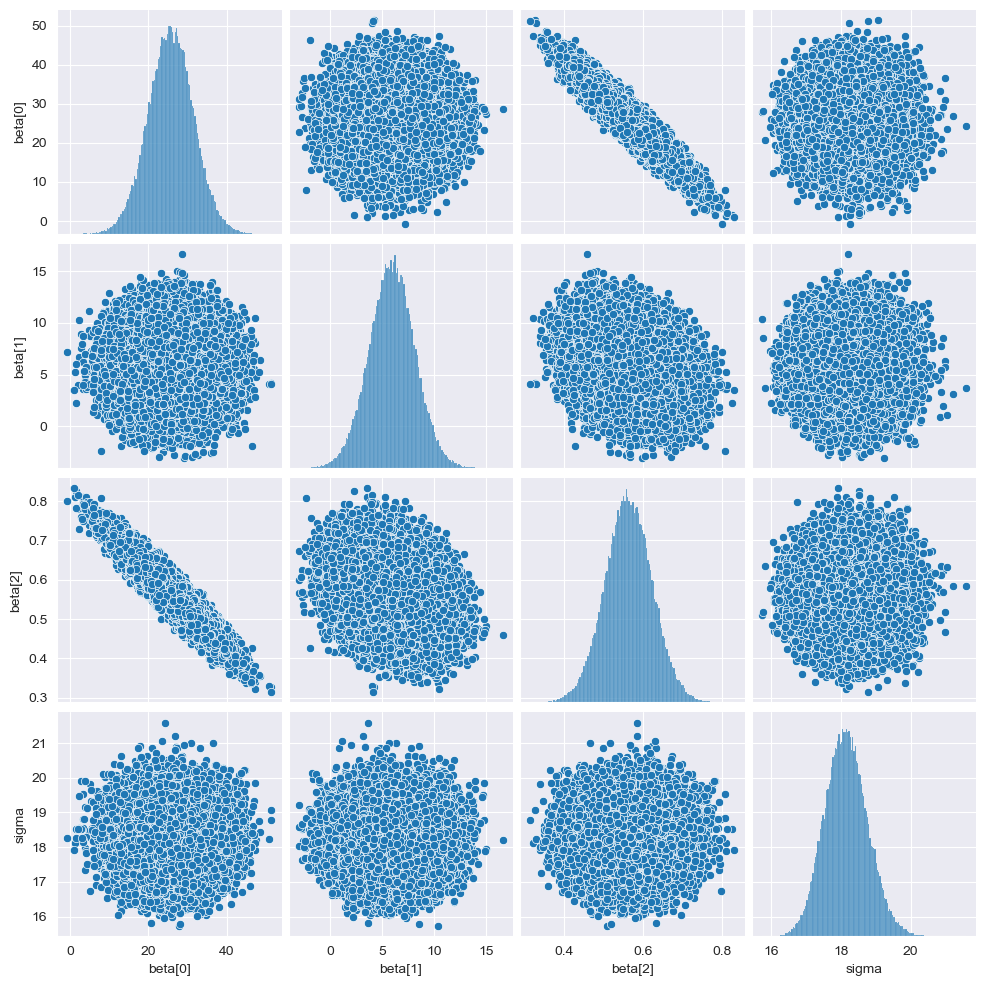

In [36]:
sns.pairplot(posterior_samples_df, vars=["beta[0]", "beta[1]", "beta[2]", "sigma"])

Text(0.5, 0, 'Step')

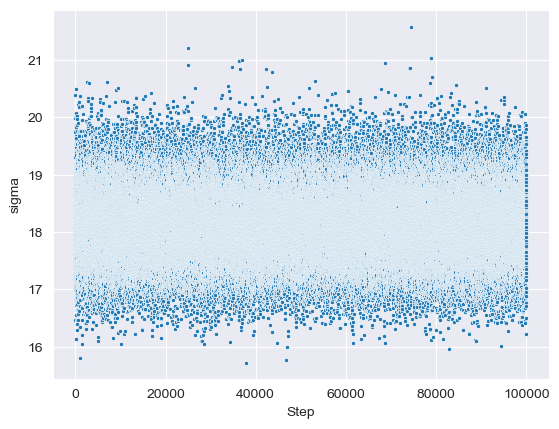

In [37]:
sns.scatterplot(posterior_samples_df, x=posterior_samples_df.index, y="sigma", marker='.')
plt.xlabel("Step")

In [38]:
predictive = infer.Predictive(model, posterior_samples=posterior_samples)
kid_score_pred = predictive(rng_key, mom_iq=mom_iq, mom_hs=mom_hs)["kid_score_obs"]

kid_score_pred_mean = kid_score_pred.mean(axis=0)
hdpi = numpyro.diagnostics.hpdi(kid_score_pred, prob=0.9)

In [39]:
idx = jnp.argsort(mom_iq)

idx_0 = idx[mom_hs[idx] == 0]
idx_1 = idx[mom_hs[idx] == 1]

Text(0.5, 0, 'mom_iq')

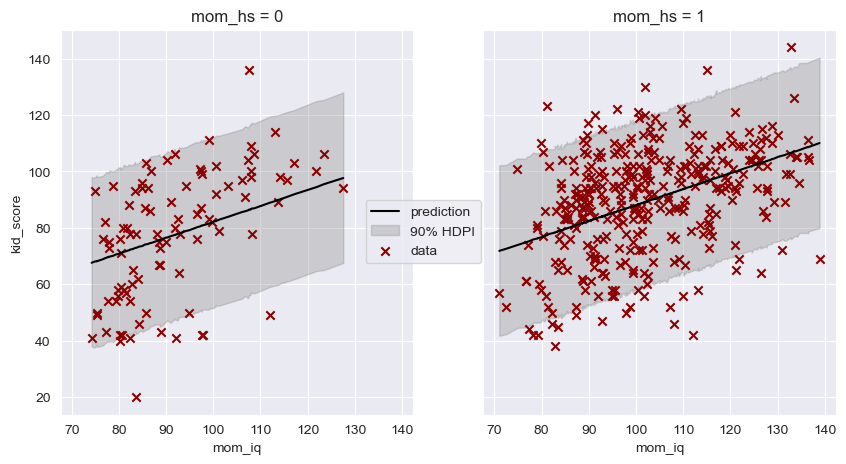

In [40]:
fig, (ax_0, ax_1) = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)

ax_0.plot(mom_iq[idx_0], kid_score_pred_mean[idx_0], ls='-', color="black", label="prediction")
ax_0.fill_between(mom_iq[idx_0], hdpi[0, idx_0], hdpi[1, idx_0], alpha=0.3, color="gray", label="90% HDPI")
ax_0.scatter(mom_iq[idx_0], kid_score[idx_0], marker='x', color="darkred", label="data")
ax_0.set_xlabel("mom_iq")
ax_0.set_ylabel("kid_score")
ax_0.set_title("mom_hs = 0")

fig.legend(loc='center')

ax_1.plot(mom_iq[idx_1], kid_score_pred_mean[idx_1], ls='-', color="black", label="prediction")
ax_1.fill_between(mom_iq[idx_1], hdpi[0, idx_1], hdpi[1, idx_1], alpha=0.3, color="gray", label="90% HDPI")
ax_1.scatter(mom_iq[idx_1], kid_score[idx_1], marker='x', color="darkred", label="data")
ax_1.set_title("mom_hs = 1")
ax_1.set_xlabel("mom_iq")

# 3. Evaluation

In [41]:
combined_df = pd.concat([
    reference_draws_df[var_cols].assign(source = "reference"),
    posterior_samples_df[var_cols].assign(source = "samples"),\
])

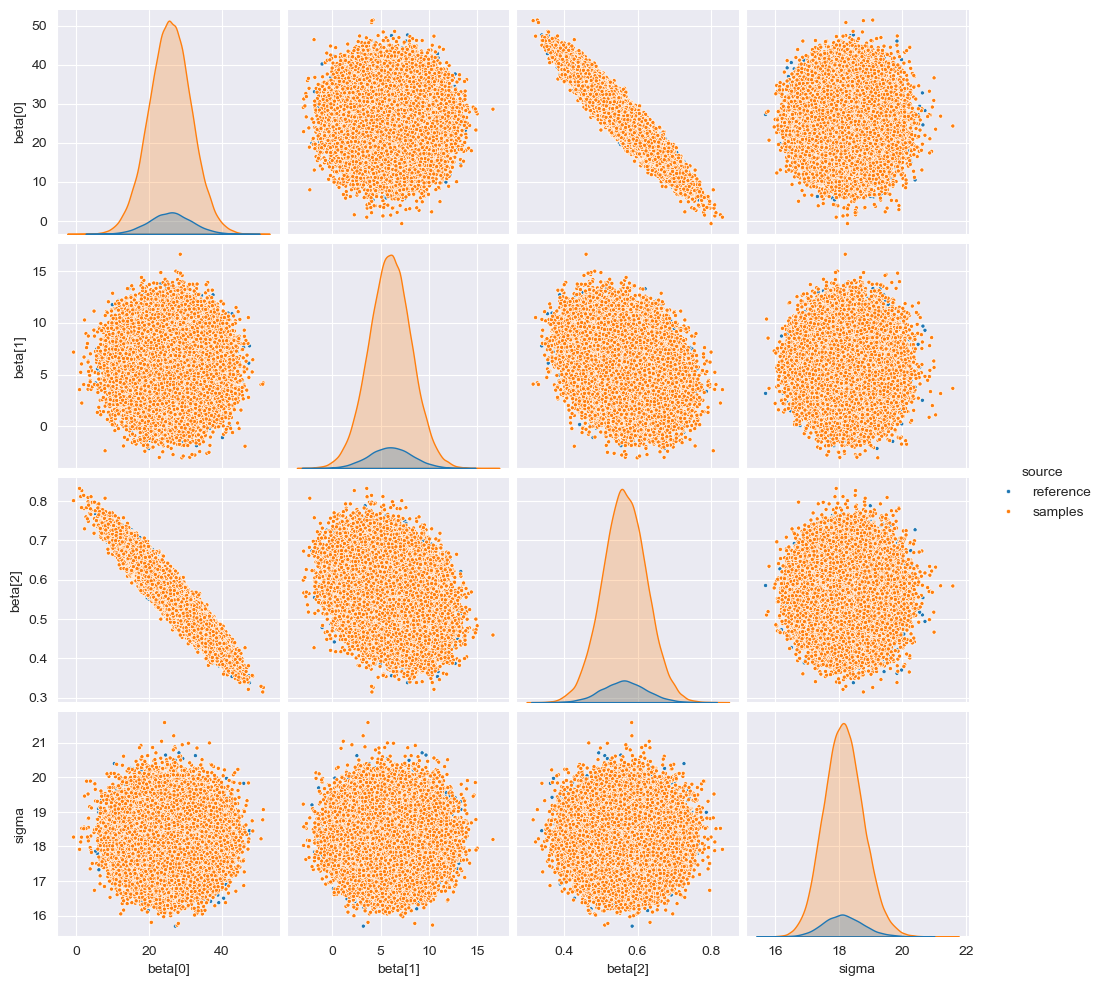

In [42]:
sns.pairplot(combined_df, vars=var_cols, hue="source", markers=".")

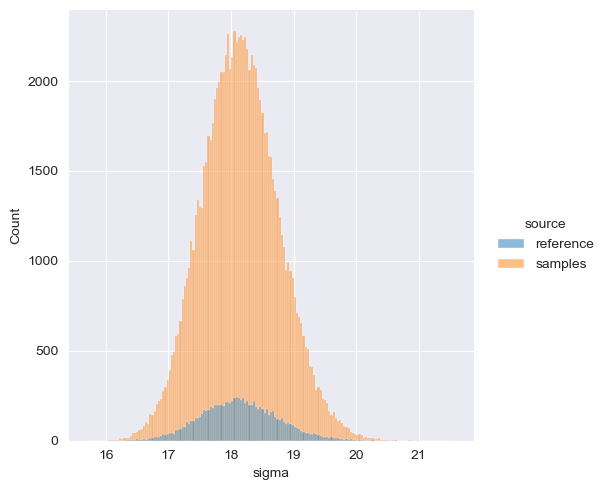

In [43]:
sns.displot(combined_df, x="sigma", hue="source")

## 3.1. Moments

In [44]:
p = 2

pth_moments = combined_df.groupby("source").aggregate(lambda vals: np.mean(vals**p)).transpose().rename_axis(f"E[|X|^{p}]")
pth_moments["% diff"] = np.abs(pth_moments["reference"] - pth_moments["samples"])/(pth_moments["reference"])*100

pth_moments

source,reference,samples,% diff
E[|X|^2],,,
beta[0],699.679786,697.433005,0.321116
beta[1],40.759592,40.120056,1.569044
beta[2],0.320618,0.321383,0.238638
sigma,329.412899,329.807671,0.119841


## 3.2. Wasserstein-1 Distance

$$ \mathcal{W}(u, v) = \inf_{\xi \in \mathcal{C} (u, v)} \int \| x-y \|_2 \xi (dx,dy) $$


In [45]:
from utils.evaluation import wasserstein_dist11_p

wasserstein_dist11_p(jnp.array(posterior_samples_df[var_cols]), jnp.array(reference_draws_df[var_cols]))

KeyboardInterrupt: 

In [47]:
from scipy.stats import wasserstein_distance_nd
from jax import vmap, jit

from ott.geometry import pointcloud, costs
from ott.solvers import linear

In [48]:
# Computing optimal 1-1 coupling

def wasserstein_disc11_p(u_values, v_values, p=2):

    cost_matrix = distance_matrix(u_values, v_values, p=p)
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    opt_cost = cost_matrix[row_ind, col_ind].mean().item()
    return opt_cost
    

def wasserstein_disc11_d(u_values, v_values, dist_fn):

    dist_vmap = vmap(lambda x: vmap(lambda y: dist_fn(x, y))(v_values), in_axes=(0,))

    cost_matrix = dist_vmap(u_values)
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    opt_cost = cost_matrix[row_ind, col_ind].mean().item()
    return opt_cost

In [49]:
def wasserstein_distance_ot(u_values, v_values):
    geom = pointcloud.PointCloud(x=u_values, y=v_values, cost_fn=costs.Euclidean())
    solve_fn = jit(linear.solve)
    ot = solve_fn(geom)
    return ot.primal_cost.item()

In [50]:
n = 1000
x=jnp.array(posterior_samples_df)[:n]
y=jnp.array(reference_draws_df)[:n]

In [51]:
geom = pointcloud.PointCloud(x=x, y=y, cost_fn=costs.Euclidean())
solve_fn = jit(linear.solve)
ot = solve_fn(geom)

print(
    " Sinkhorn has converged: ",
    ot.converged,
    "\n",
    "Error upon last iteration: ",
    ot.errors[(ot.errors > -1)][-1],
    "\n",
    "Sinkhorn required ",
    jnp.sum(ot.errors > -1),
    " iterations to converge. \n",
    "Entropy regularized OT cost: ",
    ot.ent_reg_cost,
    "\n",
    "OT cost (without entropy): ",
    jnp.sum(ot.matrix * ot.geom.cost_matrix),
)

TypeError: sub got incompatible shapes for broadcasting: (6,), (4,).

In [200]:
%%time

wasserstein_distance_ot(x, y)

CPU times: user 2.22 s, sys: 51.3 ms, total: 2.27 s
Wall time: 1.12 s


1.2382817268371582

In [208]:
def wasserstein_1d(mu, nu, p=2.0):
    """
    Compute the 1D Wasserstein distance between two arrays.
    
    Parameters:
    - mu, nu: 1D arrays.
    
    Returns:
    - float: The Wasserstein distance in 1D.
    """

    # Compute the absolute differences
    diff = jnp.abs(jnp.sort(mu) - jnp.sort(nu))
    
    # Raise to the power of p
    diff_p = diff ** p
    
    # Compute the p-th root of the sum of differences to the power p
    return jnp.power(jnp.mean(diff_p), 1.0 / p)


def max_sliced_wasserstein(mu, nu, rng_key, p=2.0, n_directions=1000):
    """
    Approximate the Wasserstein distance using the max-sliced approach with JAX.

    Parameters:
    - mu, nu: jnp.arrays of shape (n_samples, n_dimensions) representing 
              points sampled from two distributions.
    - key: JAX PRNG key for randomness.
    - n_directions: Number of random directions to project onto.

    Returns:
    - float: An approximation of the Wasserstein distance.
    """
    n_dim = mu.shape[1]
    
    # Generate random directions on the unit sphere
    directions = random.normal(rng_key, (n_directions, n_dim))
    directions = directions / jnp.linalg.norm(directions, axis=1, keepdims=True)
    
    # Vectorizing projection and 1D Wasserstein computation over directions
    project_and_compute = vmap(lambda dir: wasserstein_1d(
        jnp.dot(mu, dir),
        jnp.dot(nu, dir),
        p=p
    ))
    
    distances = project_and_compute(directions)
    
    return jnp.max(distances)

In [210]:
%%time

rng_key, key_wasserstein = random.split(rng_key, 2)
max_sliced_wasserstein(x, y, key_wasserstein, n_directions=10000).item()

CPU times: user 4.06 s, sys: 69.5 ms, total: 4.13 s
Wall time: 4.04 s


0.821402907371521

In [64]:
%%time

wasserstein_distance_nd(x, y)

CPU times: user 2min 21s, sys: 1.93 s, total: 2min 23s
Wall time: 2min 23s


1.014705041037865

In [205]:
%%time

wasserstein_distance_nd(x, y)

CPU times: user 2min 21s, sys: 2.45 s, total: 2min 24s
Wall time: 2min 24s


1.014705041037865

## 3.3. Maximum Mean Discrepancy

Given a symmetric, positive-definite kernel kernel $k(\cdot,\cdot): \mathcal{X} \times \mathcal{X} \to \mathbb{R}$,
the MMD between distributions $P$ and $Q$ is given by

$$ MMD(P, Q)^2 = \int_{\mathcal{X} \times \mathcal{X}} k(x, x') P(dx)P(dx') + \int_{\mathcal{X} \times \mathcal{X}} k(y, y') Q(dy)Q(dy') - 2\int_{\mathcal{X} \times \mathcal{X}} k(x, y) P(dx)Q(dy) $$

Usually Gaussian kernel is used with

$$ k(x,y) := \exp \left( -\frac{\| x-y \|^2}{ \ell^2 } \right) $$.


In [49]:
from sklearn.metrics.pairwise import rbf_kernel

def mmd(p, q, l=1.0):
    P = rbf_kernel(p, gamma=1/l**2)
    Q = rbf_kernel(q, gamma=1/l**2)
    PQ = rbf_kernel(p, q, gamma=1/l**2)
    mmd = np.sqrt(np.mean(P) + np.mean(Q) - 2*np.mean(PQ))
    return mmd

In [50]:
%%time
mmd(posterior_samples_df.values, reference_draws_df.values).item()

CPU times: user 2.51 s, sys: 1 s, total: 3.51 s
Wall time: 2.32 s


0.030942834407007132

## 3.4. Pareto-$\hat{k}$ diagnostic

See https://arxiv.org/abs/1507.02646